In [10]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import gridspec
from scipy.stats import gaussian_kde
import math
from scipy import stats
import numpy as np
import pylab
import seaborn as sns
%matplotlib inline

In [6]:
class Stock_analysis(object):
    #enter location of datasets file
    def __init__(self, location):
        self.location = location
        date = ['daily', 'weekly', 'monthly']
        sets = [str(self.location) + '{}.csv'.format(dt) for dt in date]
        self.dic = dict( zip( date, sets) )    
        
    #function which shows returns from stock
    def returns(self):
        interval = pd.read_csv(self.location)
        ret = list()
        for n in range( 0,len( interval ) -1 ):
            #dt format year,month,day
            ret.append( math.log( interval['Adj Close'].ix[n+1] ) - math.log( interval['Adj Close'].ix[n] ) )
        return ret
    
    #takes output of 'returns' function as input
    def hist_plot(self): 
        density = gaussian_kde(self.returns())
        x = np.linspace(min(self.returns()),max(self.returns()),100)
        plt.plot(x,density(x),'r') # distribution function
        plt.hist(self.returns(),normed=1,alpha=.3) # histogram
        plt.xlabel('Returns')
        plt.ylabel('Frequency')
        plt.title('Distribution')
        plt.show()
        
    #takes output of 'returns' function as input
    def jarque_bera(self, axis=0):
        resids = np.asarray(self.returns())
        
        # Calculate residual skewness and kurtosis
        skew = stats.skew(resids, axis=axis)
        kurtosis = 3 + stats.kurtosis(resids, axis=axis)

        # Calculate the Jarque-Bera test for normality
        n = len(resids)
        jb = (n/6.0)*( skew**2 + ( (kurtosis-3)**2/4.0 ) )
        
        #2 tail chi squared probability value
        jb_pv = stats.chi2.sf(jb, 2)
        
        #critical value at significance level alpha = 0.05
        alpha = 5.99
        
        print 'Null Hypothesis: normally distributed.'
        print 'Alternative Hypothesis: not normally distributed.'
        print
        print 'The critical value at the 5% significance level is: ', alpha, '.'
        print 'The jarque-bera test statistic is: ', jb, ', hence ',
        if jb >= alpha:
            print 'we reject the null hypothesis i.e. the data is non-normally distributed.'
        else:
            print 'we cannot reject the null hypothesis i.e. the data is normally distributed.'
        
        #return jb, jb_pv, skew, kurtosis
    
    #takes output of 'returns' function as input
    def qq_plot(self):
        stats.probplot(self.returns(), dist="norm", plot=pylab)
        pylab.show()

    #change between daily, weekly and monthly
    def interval(self, inter):
        self.location = self.dic[inter]
    
    #autocorrelation
    ''' takes the return values, shifts it by time t, and compares with original for correlation.
        Returns should be uncorrelated, where as absolute and square of returns should show positive
        correlation. This is known as volatility clustering i.e. that large changes tend to be followed by large changes
        and small changes followed by small.
    '''
    def auto_correlation(self):
        abs_ret = [abs(i) for i in self.returns()]
        sqr_ret = [i**2 for i in self.returns()]
        
        fig = plt.figure(figsize=(18, 4)) 
        gs = gridspec.GridSpec(1, 6) 
        gs.update(wspace=-0.3)
        
        #first plot: returns Vs returns
        ax0 = plt.subplot(gs[0,0:1])
        autocorr = np.correlate(self.returns(), self.returns(), mode = 'full') 
        ax0.plot(autocorr[autocorr.size/2:])
        plt.xlabel('Discrete Lag Value')
        plt.ylabel('Correlation Coefficient')
        plt.title('Autocorrelation of Returns')
        
        #second plot: squared returns Vs squared returns
        ax1 = plt.subplot(gs[0,2:3])
        autocorr = np.correlate(sqr_ret, sqr_ret, mode = 'full') 
        ax1.plot(autocorr[autocorr.size/2:])
        plt.xlabel('Discrete Lag Value')
        plt.ylabel('Correlation Coefficient')
        plt.title('Autocorrelation of Sqaured Returns')
        
        #thrid plot: absolute returns Vs absolute returns
        ax2 = plt.subplot(gs[0,4:5])
        autocorr = np.correlate(abs_ret, abs_ret, mode = 'full') 
        ax2.plot(autocorr[autocorr.size/2:])
        plt.xlabel('Discrete Lag Value')
        plt.ylabel('Correlation Coefficient')
        plt.title('Autocorrelation of Absolute Returns')

In [7]:
apple = Stock_analysis('C:\\Users\\nadeem\\Desktop\\Data Science\\SEM3 Masters Project\\Apple (AAPL)\\')

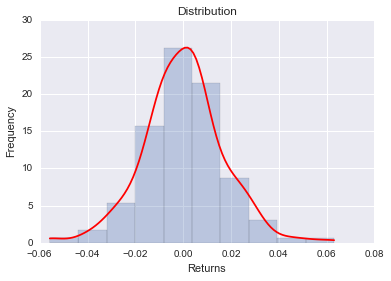

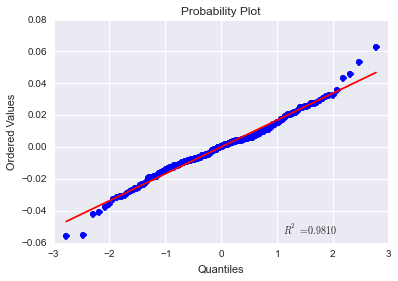

Null Hypothesis: normally distributed.
Alternative Hypothesis: not normally distributed.

The critical value at the 5% significance level is:  5.99 .
The jarque-bera test statistic is:  18.1518503884 , hence  we reject the null hypothesis i.e. the data is non-normally distributed.


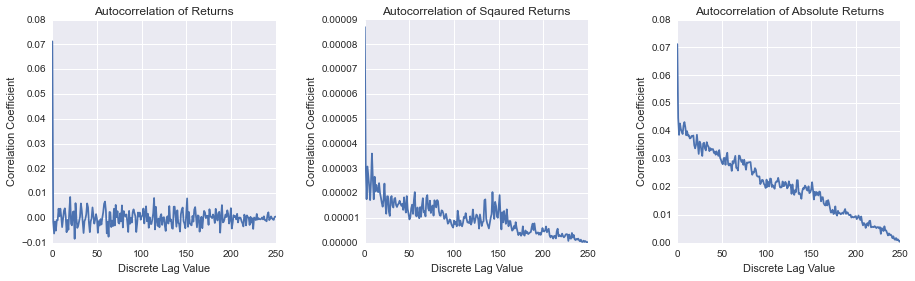

In [8]:
apple.interval('daily')

apple.hist_plot()
apple.qq_plot()
apple.jarque_bera()
apple.auto_correlation()

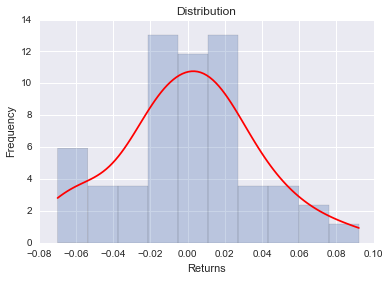

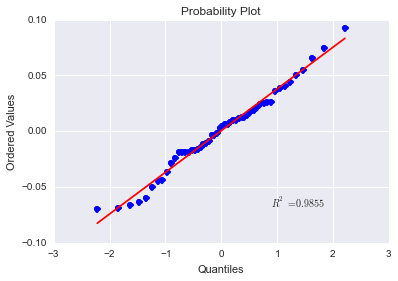

Null Hypothesis: normally distributed.
Alternative Hypothesis: not normally distributed.

The critical value at the 5% significance level is:  5.99 .
The jarque-bera test statistic is:  0.0693497589001 , hence  we cannot reject the null hypothesis i.e. the data is normally distributed.


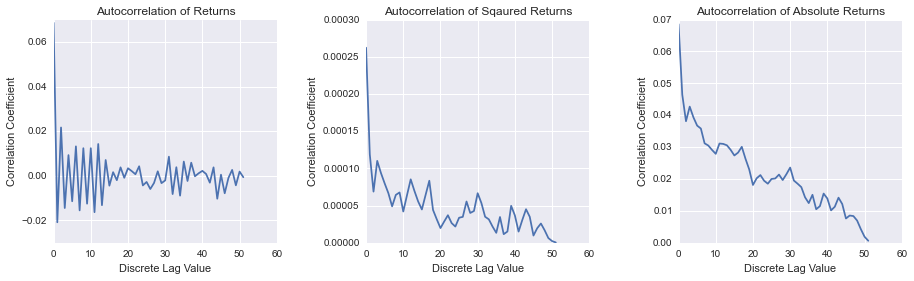

In [9]:
apple.interval('weekly')

apple.hist_plot()
apple.qq_plot()
apple.jarque_bera()
apple.auto_correlation()

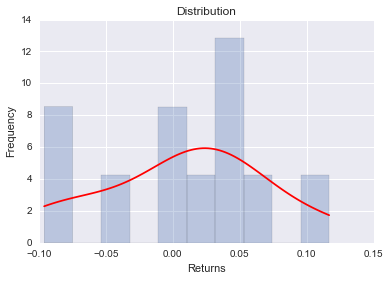

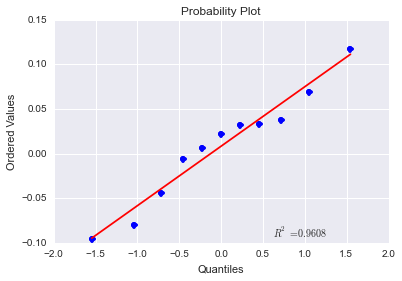

Null Hypothesis: normally distributed.
Alternative Hypothesis: not normally distributed.

The critical value at the 5% significance level is:  5.99 .
The jarque-bera test statistic is:  0.209914611355 , hence  we cannot reject the null hypothesis i.e. the data is normally distributed.


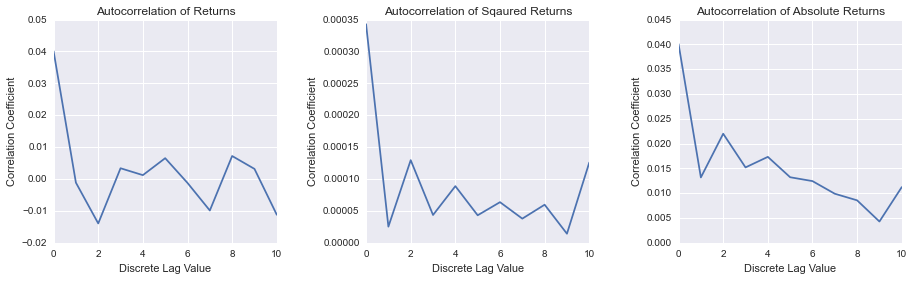

In [10]:
apple.interval('monthly')

apple.hist_plot()
apple.qq_plot()
apple.jarque_bera()
apple.auto_correlation()

In [11]:
google = Stock_analysis('C:\\Users\\nadeem\\Desktop\\Data Science\\SEM3 Masters Project\\Alphabet (GOOGL)\\')

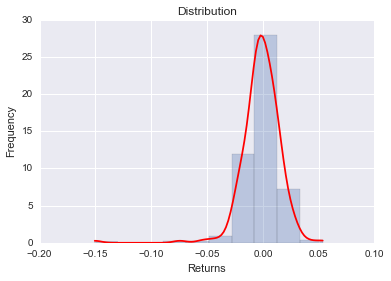

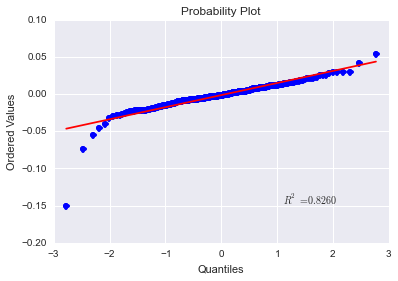

Null Hypothesis: normally distributed.
Alternative Hypothesis: not normally distributed.

The critical value at the 5% significance level is:  5.99 .
The jarque-bera test statistic is:  4451.14474206 , hence  we reject the null hypothesis i.e. the data is non-normally distributed.


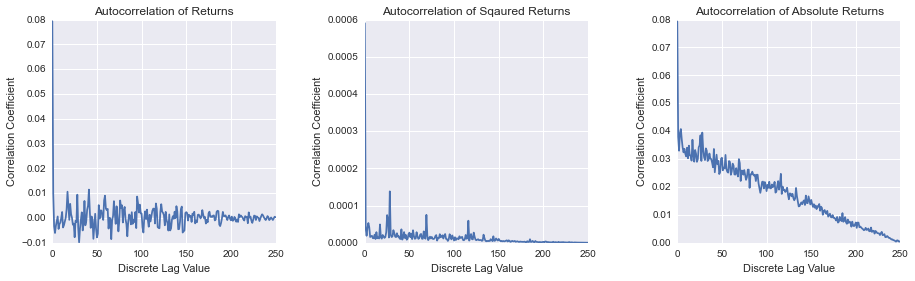

In [12]:
google.interval('daily')

google.hist_plot()
google.qq_plot()
google.jarque_bera()
google.auto_correlation()

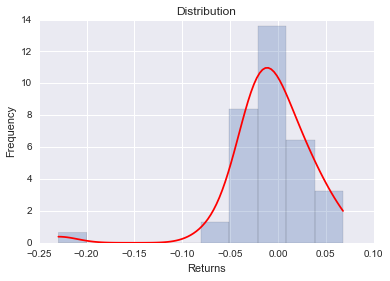

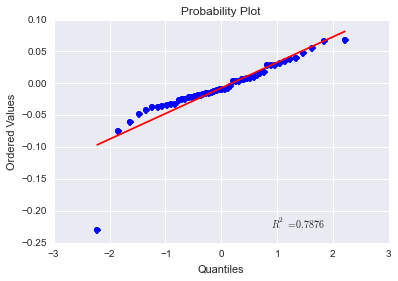

Null Hypothesis: normally distributed.
Alternative Hypothesis: not normally distributed.

The critical value at the 5% significance level is:  5.99 .
The jarque-bera test statistic is:  294.876628153 , hence  we reject the null hypothesis i.e. the data is non-normally distributed.


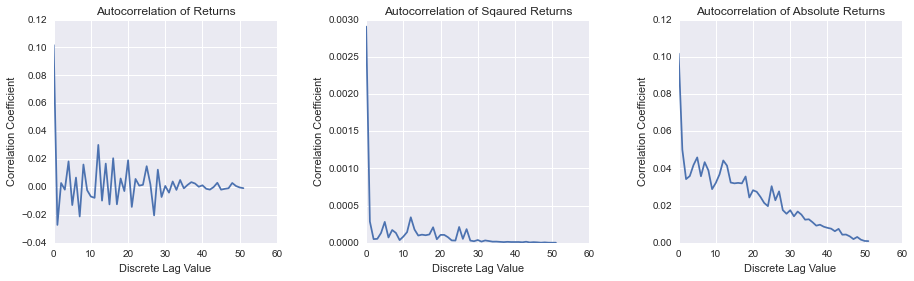

In [13]:
google.interval('weekly')

google.hist_plot()
google.qq_plot()
google.jarque_bera()
google.auto_correlation()

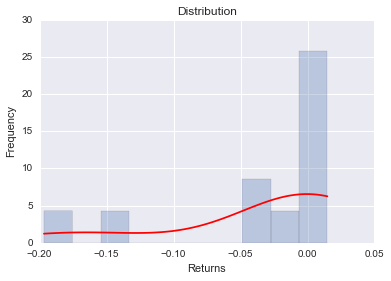

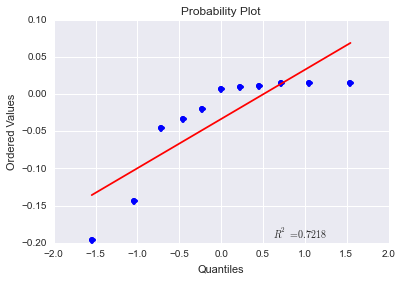

Null Hypothesis: normally distributed.
Alternative Hypothesis: not normally distributed.

The critical value at the 5% significance level is:  5.99 .
The jarque-bera test statistic is:  4.05830773207 , hence  we cannot reject the null hypothesis i.e. the data is normally distributed.


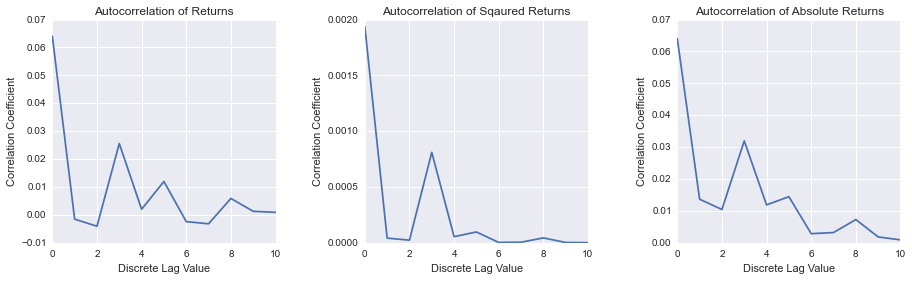

In [14]:
google.interval('monthly')

google.hist_plot()
google.qq_plot()
google.jarque_bera()
google.auto_correlation()

In [15]:
facebook = Stock_analysis('C:\\Users\\nadeem\\Desktop\\Data Science\\SEM3 Masters Project\\Facebook (FB)\\')

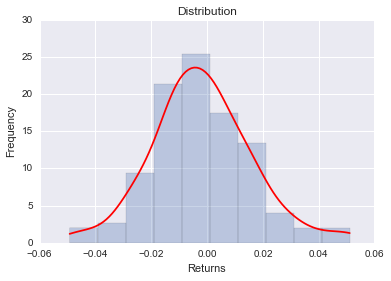

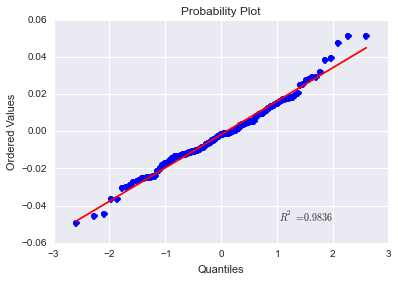

Null Hypothesis: normally distributed.
Alternative Hypothesis: not normally distributed.

The critical value at the 5% significance level is:  5.99 .
The jarque-bera test statistic is:  5.12184171038 , hence  we cannot reject the null hypothesis i.e. the data is normally distributed.


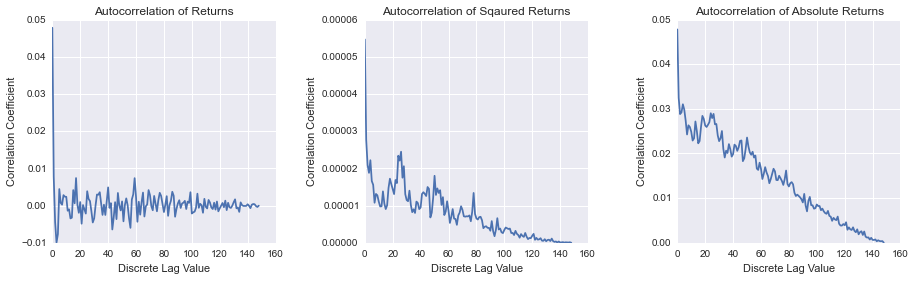

In [16]:
facebook.interval('daily')

facebook.hist_plot()
facebook.qq_plot()
facebook.jarque_bera()
facebook.auto_correlation()

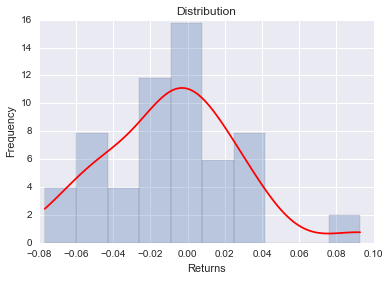

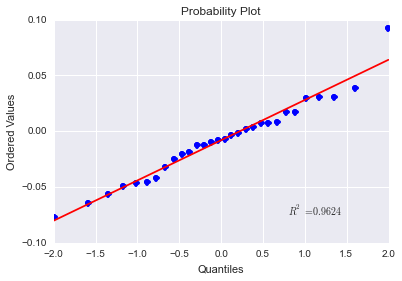

Null Hypothesis: normally distributed.
Alternative Hypothesis: not normally distributed.

The critical value at the 5% significance level is:  5.99 .
The jarque-bera test statistic is:  1.39175922386 , hence  we cannot reject the null hypothesis i.e. the data is normally distributed.


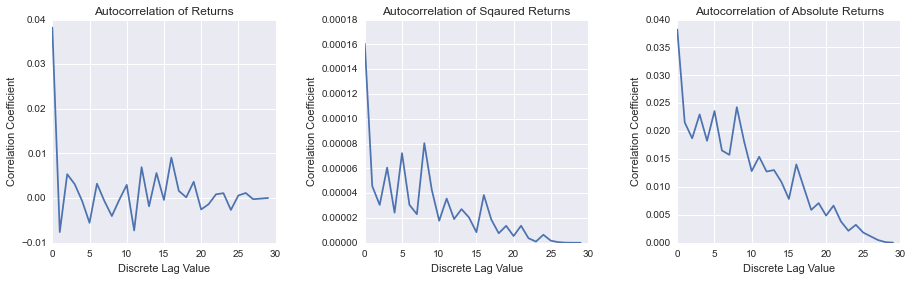

In [17]:
facebook.interval('weekly')

facebook.hist_plot()
facebook.qq_plot()
facebook.jarque_bera()
facebook.auto_correlation()

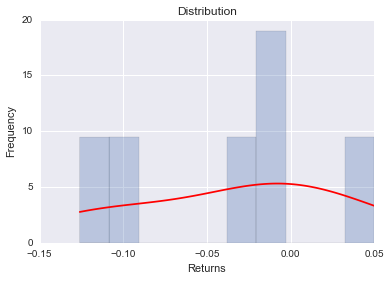

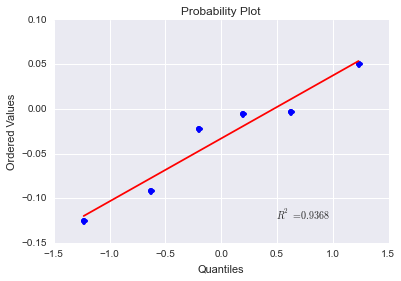

Null Hypothesis: normally distributed.
Alternative Hypothesis: not normally distributed.

The critical value at the 5% significance level is:  5.99 .
The jarque-bera test statistic is:  0.404750425568 , hence  we cannot reject the null hypothesis i.e. the data is normally distributed.


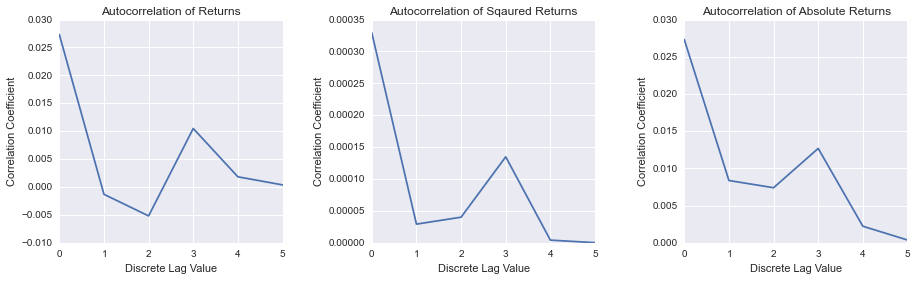

In [18]:
facebook.interval('monthly')

facebook.hist_plot()
facebook.qq_plot()
facebook.jarque_bera()
facebook.auto_correlation()

---

In [19]:
class Sim_analysis(object):
    #enter location of datasets file
    def __init__(self, returns):
        self.returns = returns
        
    #takes output of 'returns' function as input
    def hist_plot(self): 
        density = gaussian_kde(self.returns)
        x = np.linspace(min(self.returns),max(self.returns),100)
        plt.plot(x,density(x),'r') # distribution function
        plt.hist(self.returns,normed=1,alpha=.3) # histogram
        plt.xlabel('Returns')
        plt.ylabel('Frequency')
        plt.title('Distribution')
        plt.show()
        
    #takes output of 'returns' function as input
    def jarque_bera(self, axis=0):
        resids = np.asarray(self.returns)
        
        # Calculate residual skewness and kurtosis
        skew = stats.skew(resids, axis=axis)
        kurtosis = 3 + stats.kurtosis(resids, axis=axis)

        # Calculate the Jarque-Bera test for normality
        n = len(resids)
        jb = (n/6.0)*( skew**2 + ( (kurtosis-3)**2/4.0 ) )
        
        #2 tail chi squared probability value
        jb_pv = stats.chi2.sf(jb, 2)
        
        #critical value at significance level alpha = 0.05
        alpha = 5.99
        
        print 'Null Hypothesis: normally distributed.'
        print 'Alternative Hypothesis: not normally distributed.'
        print
        print 'The critical value at the 5% significance level is: ', alpha, '.'
        print 'The jarque-bera test statistic is: ', jb, ', hence ',
        if jb >= alpha:
            print 'we reject the null hypothesis i.e. the data is non-normally distributed.'
        else:
            print 'we cannot reject the null hypothesis i.e. the data is normally distributed.'
        
        #return jb, jb_pv, skew, kurtosis
    
    #takes output of 'returns' function as input
    def qq_plot(self):
        stats.probplot(self.returns, dist="norm", plot=pylab)
        pylab.show()

    #change between daily, weekly and monthly
    def interval(self, inter):
        self.location = self.dic[inter]
    
    #autocorrelation
    ''' takes the return values, shifts it by time t, and compares with original for correlation.
        Returns should be uncorrelated, where as absolute and square of returns should show positive
        correlation. This is known as volatility clustering i.e. that large changes tend to be followed by large changes
        and small changes followed by small.
    '''
    def auto_correlation(self):
        abs_ret = [abs(i) for i in self.returns]
        sqr_ret = [i**2 for i in self.returns]
        
        fig = plt.figure(figsize=(18, 4)) 
        gs = gridspec.GridSpec(1, 6) 
        gs.update(wspace=-0.3)
        
        #first plot: returns Vs returns
        ax0 = plt.subplot(gs[0,0:1])
        autocorr = np.correlate(self.returns, self.returns, mode = 'full') 
        ax0.plot(autocorr[autocorr.size/2:])
        plt.xlabel('Discrete Lag Value')
        plt.ylabel('Correlation Coefficient')
        plt.title('Autocorrelation of Returns')
        
        #second plot: squared returns Vs squared returns
        ax1 = plt.subplot(gs[0,2:3])
        autocorr = np.correlate(sqr_ret, sqr_ret, mode = 'full') 
        ax1.plot(autocorr[autocorr.size/2:])
        plt.xlabel('Discrete Lag Value')
        plt.ylabel('Correlation Coefficient')
        plt.title('Autocorrelation of Sqaured Returns')
        
        #thrid plot: absolute returns Vs absolute returns
        ax2 = plt.subplot(gs[0,4:5])
        autocorr = np.correlate(abs_ret, abs_ret, mode = 'full') 
        ax2.plot(autocorr[autocorr.size/2:])
        plt.xlabel('Discrete Lag Value')
        plt.ylabel('Correlation Coefficient')
        plt.title('Autocorrelation of Absolute Returns')

In [20]:
from ABM import *

# 3 Agents

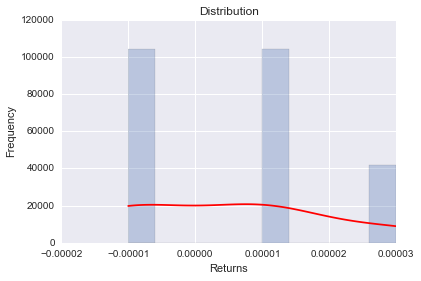

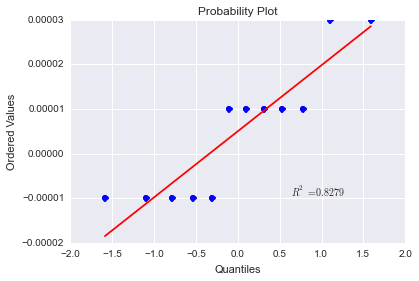

Null Hypothesis: normally distributed.
Alternative Hypothesis: not normally distributed.

The critical value at the 5% significance level is:  5.99 .
The jarque-bera test statistic is:  0.853632 , hence  we cannot reject the null hypothesis i.e. the data is normally distributed.


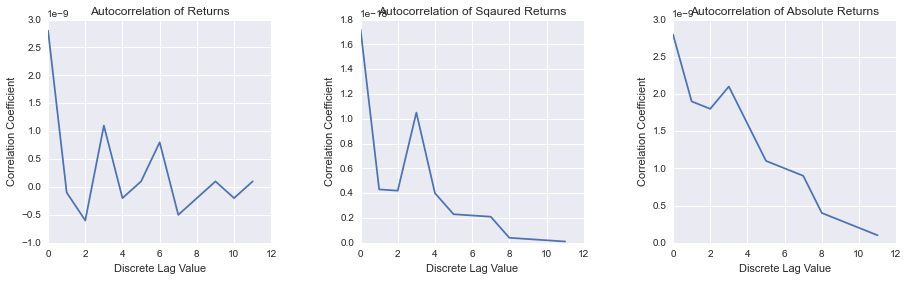

In [36]:
#monthly
sim_monthly = Sim_analysis( simulation(3,3,12) )
sim_monthly.hist_plot()
sim_monthly.qq_plot()
sim_monthly.jarque_bera()
sim_monthly.auto_correlation()

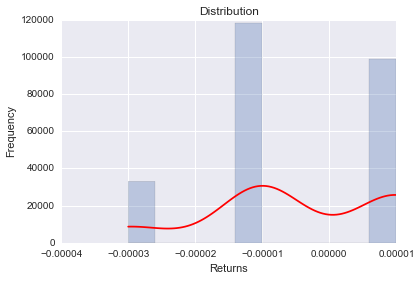

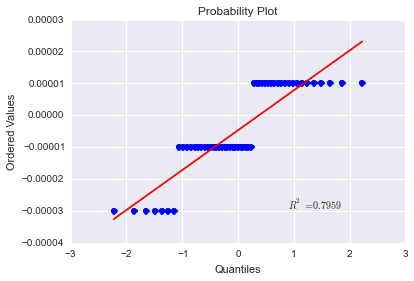

Null Hypothesis: normally distributed.
Alternative Hypothesis: not normally distributed.

The critical value at the 5% significance level is:  5.99 .
The jarque-bera test statistic is:  2.7975299963 , hence  we cannot reject the null hypothesis i.e. the data is normally distributed.


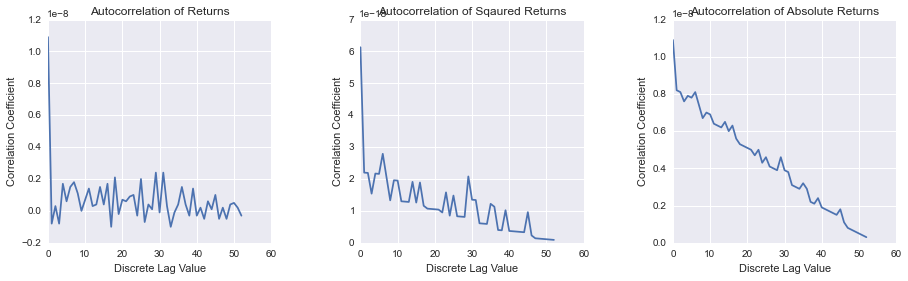

In [37]:
#weekly
sim_weekly = Sim_analysis( simulation(3,3,53) )
sim_weekly.hist_plot()
sim_weekly.qq_plot()
sim_weekly.jarque_bera()
sim_weekly.auto_correlation()

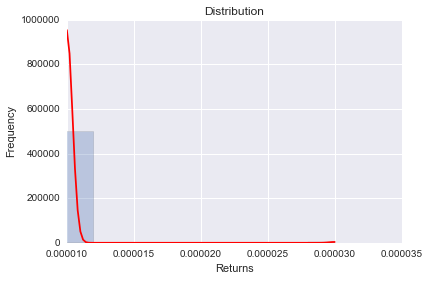

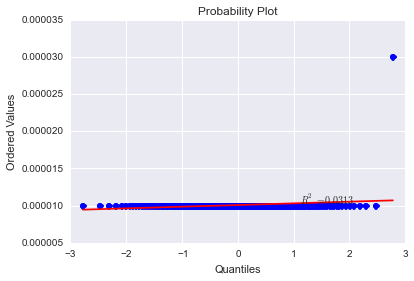

Null Hypothesis: normally distributed.
Alternative Hypothesis: not normally distributed.

The critical value at the 5% significance level is:  5.99 .
The jarque-bera test statistic is:  651073.332836 , hence  we reject the null hypothesis i.e. the data is non-normally distributed.


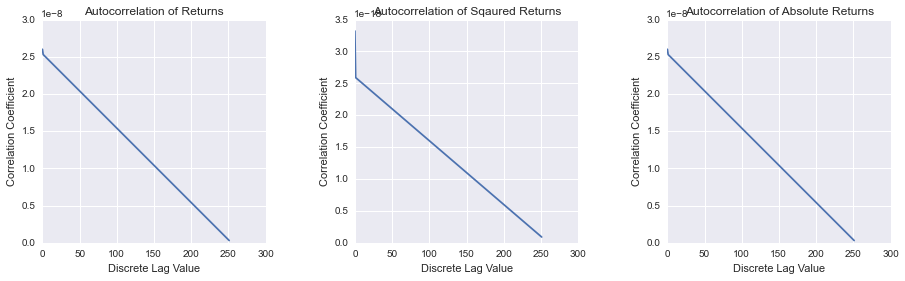

In [38]:
#daily
sim_daily = Sim_analysis( simulation(3,3,252) )
sim_daily.hist_plot()
sim_daily.qq_plot()
sim_daily.jarque_bera()
sim_daily.auto_correlation()

# 27 agents

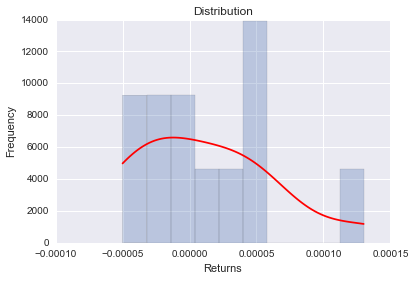

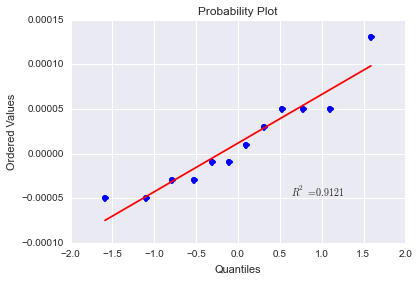

Null Hypothesis: normally distributed.
Alternative Hypothesis: not normally distributed.

The critical value at the 5% significance level is:  5.99 .
The jarque-bera test statistic is:  1.18310413383 , hence  we cannot reject the null hypothesis i.e. the data is normally distributed.


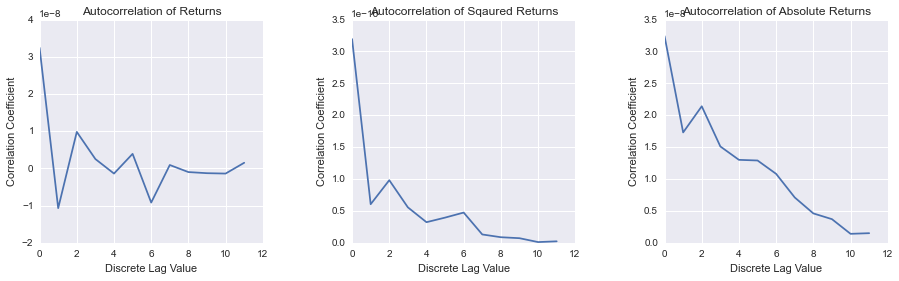

In [39]:
#monthly
sim_monthly2 = Sim_analysis( simulation(3,27,12) )
sim_monthly2.hist_plot()
sim_monthly2.qq_plot()
sim_monthly2.jarque_bera()
sim_monthly2.auto_correlation()

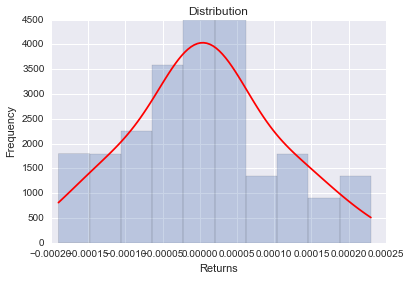

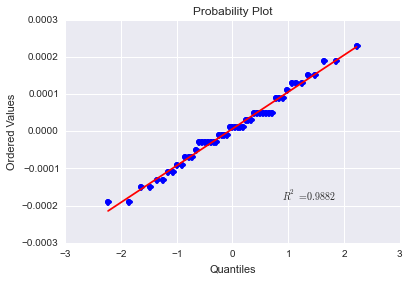

Null Hypothesis: normally distributed.
Alternative Hypothesis: not normally distributed.

The critical value at the 5% significance level is:  5.99 .
The jarque-bera test statistic is:  0.314261650734 , hence  we cannot reject the null hypothesis i.e. the data is normally distributed.


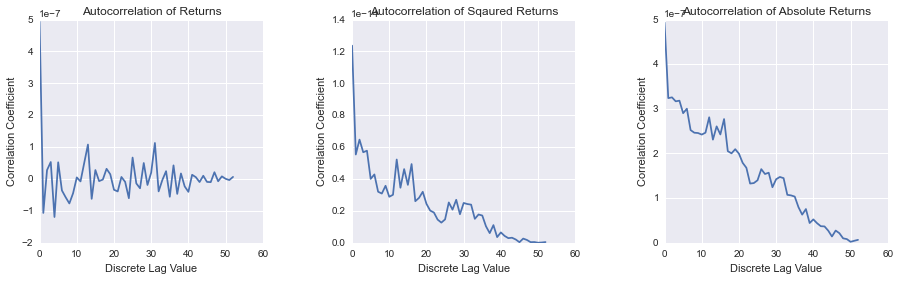

In [40]:
#weekly
sim_weekly2 = Sim_analysis( simulation(3,27,53) )
sim_weekly2.hist_plot()
sim_weekly2.qq_plot()
sim_weekly2.jarque_bera()
sim_weekly2.auto_correlation()

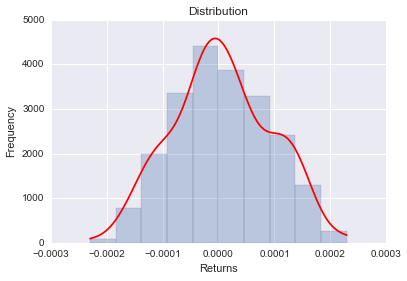

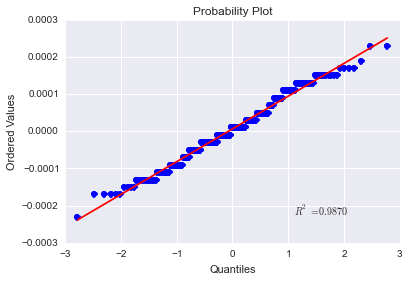

Null Hypothesis: normally distributed.
Alternative Hypothesis: not normally distributed.

The critical value at the 5% significance level is:  5.99 .
The jarque-bera test statistic is:  2.72176243362 , hence  we cannot reject the null hypothesis i.e. the data is normally distributed.


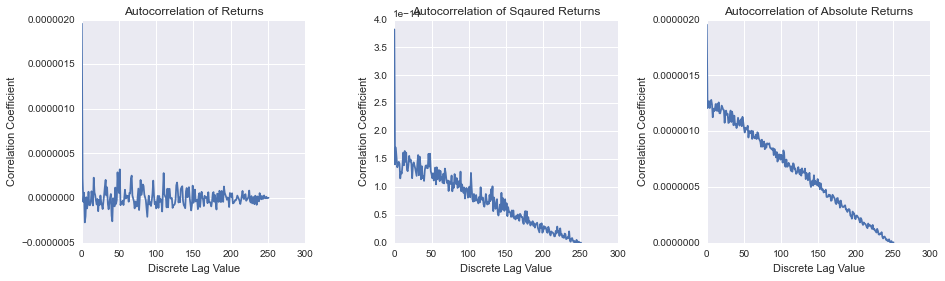

In [41]:
#daily
sim_daily2 = Sim_analysis( simulation(3,27,252) )
sim_daily2.hist_plot()
sim_daily2.qq_plot()
sim_daily2.jarque_bera()
sim_daily2.auto_correlation()

# 99 agents

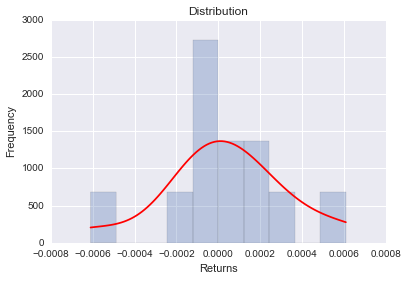

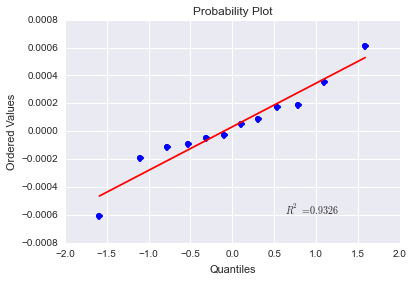

Null Hypothesis: normally distributed.
Alternative Hypothesis: not normally distributed.

The critical value at the 5% significance level is:  5.99 .
The jarque-bera test statistic is:  0.250127426335 , hence  we cannot reject the null hypothesis i.e. the data is normally distributed.


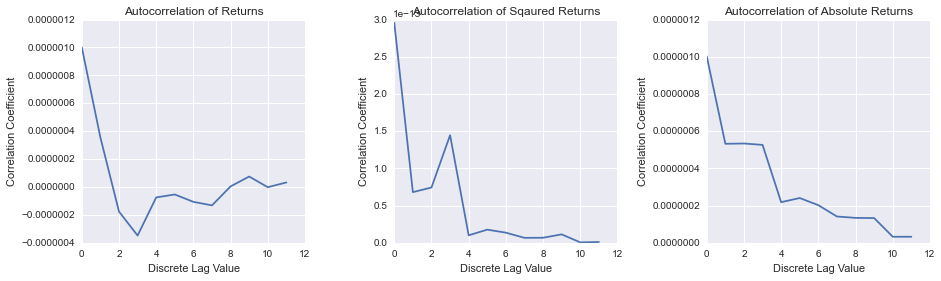

In [44]:
#monthly
sim_monthly3 = Sim_analysis( simulation(3,99,12) )
sim_monthly3.hist_plot()
sim_monthly3.qq_plot()
sim_monthly3.jarque_bera()
sim_monthly3.auto_correlation()

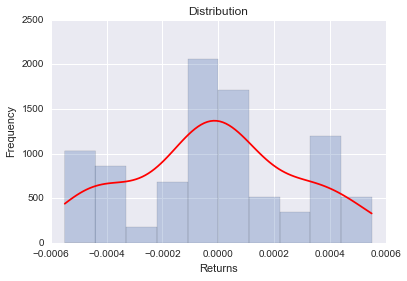

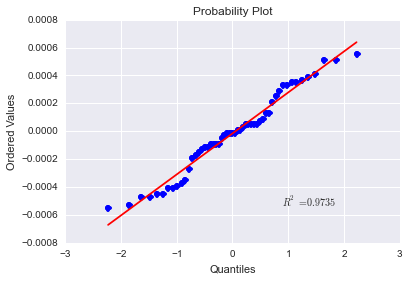

Null Hypothesis: normally distributed.
Alternative Hypothesis: not normally distributed.

The critical value at the 5% significance level is:  5.99 .
The jarque-bera test statistic is:  1.1554584013 , hence  we cannot reject the null hypothesis i.e. the data is normally distributed.


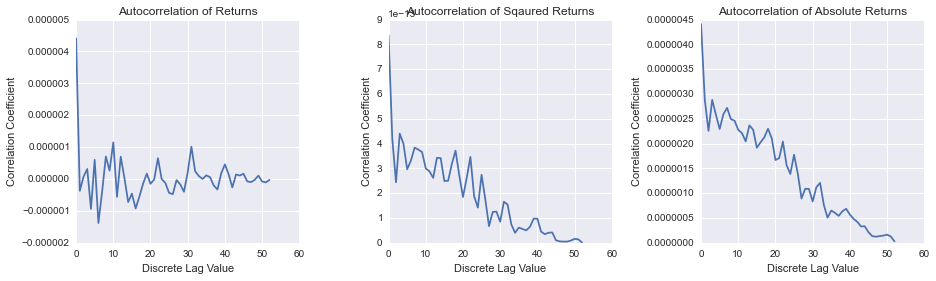

In [43]:
#weekly
sim_weekly3 = Sim_analysis( simulation(3,99,53) )
sim_weekly3.hist_plot()
sim_weekly3.qq_plot()
sim_weekly3.jarque_bera()
sim_weekly3.auto_correlation()

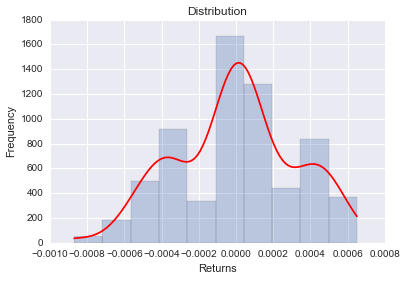

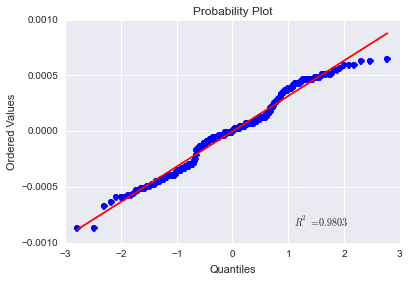

Null Hypothesis: normally distributed.
Alternative Hypothesis: not normally distributed.

The critical value at the 5% significance level is:  5.99 .
The jarque-bera test statistic is:  2.88490028231 , hence  we cannot reject the null hypothesis i.e. the data is normally distributed.


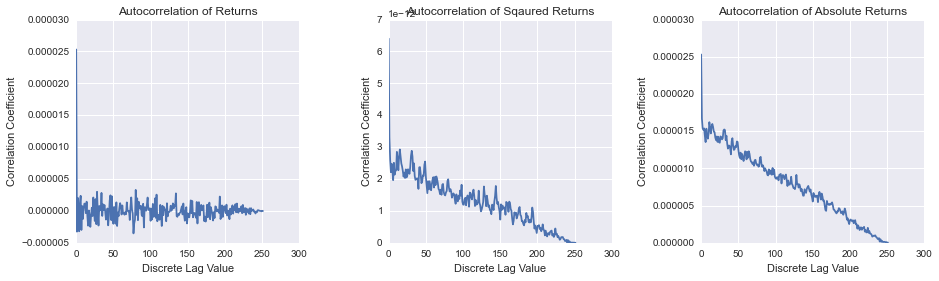

In [42]:
#daily
sim_daily3 = Sim_analysis( simulation(3,99,252) )
sim_daily3.hist_plot()
sim_daily3.qq_plot()
sim_daily3.jarque_bera()
sim_daily3.auto_correlation()